In [ ]:
import numpy as np
import escape as esc
esc.require('0.9.7')

from escape.utils.widgets import show

# SAXS. Form-factors. Superball

Author: Denis Korolkov


Calculates the form factor, $P(q)$ for particles with superball geometry which describes
a smooth transition between cubic and spherical morphologies with rounded corners and edges.



## Parameters


|Parameter|	Variable| Value|
|---------|---------|------|
|0|	Scale|	1.0|
|1|	Average Radius (nm)|	10.0|
|2|	Power, p |	1.0|
|3|  Polydispersity (0-1)|	0.05|
|4|	SLD ($nm^{-2}$)|	1.0e-4|
|5|	incoherent Background(cm^{-1})|	0.000|


Parameter[0] (scale) is correlated with the SLD's that describe the particle. No more than one of these parameters can be free during model fitting.

## Usage notes



A superball is a geometric
body that is defined by the
shape parameter $p$. 

Any point of a superball geometry satisfies the following relation




where $a$ is the edge length of the superball. The case $p = 1$ is
equivalent to the sphere with the radius $r = a/2$,
and the case $p = ∞$ corresponds to a cube.

The form factor amplitude has no
analytic expression and needs to be solved numerically.
The amplitude of the oriented superball form
factor $p_{orient}(\vec q)$ for an arbitrary $\vec q$ direction is given by



where



The integral splits onto real and imaginary part wherte the latter vanishes and the former can be transformed 
to 

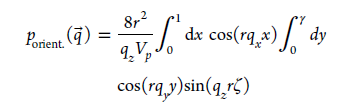

The particle
size distribution of choice $\Gamma$ leads to the integral

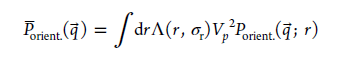

and the orientation distribution is performed by integrating
over all possible directions

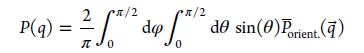

The particle volume 

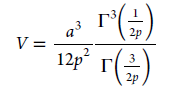

## Reference

D. Dresen, A. Qdemat, S. Ulusoy, F. Mees, D. Zákutná, E. Wetterskog,
E. Kentzinger, G. Salazar-Alvarez, S. Disch, J. Phys. Chem. C 2021, 125, 23356−23363

In [ ]:
#Definition of parameters

p=esc.par("P", 1, userlim=[0.01, 50])
r=esc.par("R", 10, units="nm", userlim=[-100000, 100000])
r0=esc.par("R0", 10, units="nm", userlim=[-100000, 100000])
s = esc.par("Polydispersity", 0.05)

#Definition of variables
x = esc.var("x")
y = esc.var("y")
z = esc.var("z")

Q = esc.var("Q")
phi = esc.var("Phi")
theta = esc.var("Theta")

Qx = Q*esc.cos(phi)*esc.sin(theta)
Qy = Q*esc.sin(phi)*esc.sin(theta)
Qz = Q*esc.cos(theta)

#\ksi and \gamma
Ksi = (1-x**(2*p)-y**(2*p))**(1/(2*p))
G = (1-x**(2*p))**(1/(2*p))

#form-factor integrals
Fxy = esc.cos(r*Qy*y)*esc.sin(r*Qz*Ksi)
Fy = esc.integral(Fxy, y, 0, G, 21, epsabs=1e-8, epsrel=1e-8)
F = esc.integral(esc.cos(r*Qx*x)*Fy, x, 0, 1, 21, epsabs=1e-8, epsrel=1e-8)

#form-factor for certain particle orientation
Pori = (F*8*r**2/Qz)**2

#integral over size distribution
PoAv = esc.average_lognorm(Pori, s, r, r0, 21, epsrel=1e-8, epsabs=1e-8)

#average volume, integral has analytical solution
V_c = 8/(12*p**2)*esc.tgamma(1/(2*p))**3/esc.tgamma(3/(2*p))
V_av = V_c*r0**3*esc.exp(4.5*s**2) 

#integral over phi angles
PoAv_phi = esc.integral(PoAv, phi, 0, np.pi/2, 21)
#untegral over theta angles
PoAv_theta = 1/V_av*esc.integral(PoAv_phi, theta, 0, np.pi/2, 21)

K_Q = esc.kernel("P(Q)", PoAv_theta)

In [ ]:
coords=np.linspace(0.001, 3, 100)
show(K_Q, coordinates=coords, xlog=True, ylog=True, xlabel="Q", ylabel="I")